## Descarga de Catchas

In [9]:
# código para descargar las imágenes capcha

# !pip install selenium # para instalar selenium

from selenium import webdriver
from selenium.webdriver.common.by import By
import os
import time

# Configuración de Selenium
options = webdriver.FirefoxOptions()
options.add_argument("--headless")  # Ejecuta Chrome sin GUI
driver = webdriver.Firefox(options=options)

out_dir = "descarga"
os.makedirs(out_dir, exist_ok=True)

cant_catchas = 5

for i in range(cant_catchas):
    # Navegar a la URL del CAPTCHA
    captcha_url = "https://www2.sunarp.gob.pe/consulta-vehicular/inicio"
    driver.get(captcha_url) # Abrir página
    time.sleep(1)
    ruta_img = "/html/body/app-root/nz-content/div/app-inicio/app-vehicular/nz-layout/nz-content/div/nz-card/div/app-form-datos-consulta/div/form/fieldset/nz-form-item/table/tr/td/img"
    image_element = driver.find_element(By.XPATH, ruta_img)
    image_url = image_element.get_attribute("src")
    driver.get(image_url)

    # Guardar la imagen en el disco
    filename = out_dir + "/" + ('00000' + str(i+1))[-5:] + '.png'
    cap = driver.find_element(by=By.XPATH, value="/html/body/img").screenshot(filename) # noqa
    if cap:
        print(filename, "descargado correctamente")

# Cerrar el navegador
driver.quit()

descarga/00001.png descargado correctamente
descarga/00002.png descargado correctamente
descarga/00003.png descargado correctamente
descarga/00004.png descargado correctamente
descarga/00005.png descargado correctamente


## Renombrar Imágenes

Archivo encontrado: descarga\00046.png


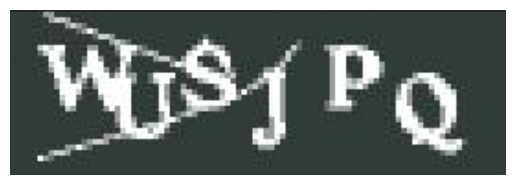

El nombre del capcha debe ser de 6 letras


AssertionError: 

In [6]:
import os
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

carpeta = Path("descarga")
out_dir = "catchas_renombrados"
os.makedirs(out_dir, exist_ok=True)

archivos = [arc for arc in carpeta.iterdir()]
for archivo in archivos:
    if archivo.is_file():
        clear_output(wait=True)
        print("Archivo encontrado:", archivo)
        image = cv2.imread(archivo)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.show()
        name = input()
        if len(name) != 6:
            print("El nombre del capcha debe ser de 6 letras")
            assert(False)
        
        print(name)
        time.sleep(0) # tiempo de espera para revisar lo escrito

        output_path = out_dir + "/" + name + ".png"
        cv2.imwrite(output_path, image)

        ruta_archivo = archivo

        # Verificar si el archivo existe antes de eliminarlo
        if os.path.exists(archivo):
            os.remove(archivo)
        else:
            print(f"El archivo no existe: {archivo}")



## Conteo de Catchas

In [5]:
from pathlib import Path

sin_renombrar = Path("descarga")
renombrados = Path("catchas_renombrados")

print("Imágenes sin renombrar:", len([arc for arc in sin_renombrar.iterdir()]))
print("Imágenes renombradas:", len([arc for arc in renombrados.iterdir()]))

Imágenes sin renombrar: 84
Imágenes renombradas: 32
